<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonMachineLearning/blob/main/house_price_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price 실습

github의 house_price.csv파일 사용할 것

1. house_price_작성자이름.ipynb
2. 탐색적 데이터 분석 및 시각화
3. train_test_split - 7:3, 2045 적용
4. 단일 회귀 및 다중회귀 수행
5. Scaling 또는 Encoding 적용(필수 X) => scaling 하지 않음/encoding을 수행해보기만 하고 분석에 활용하지는 않음
6. 최적의 R-Square/MSE 도출



### 1. 데이터 살펴보기

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/house_price.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   object
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


In [4]:
DF.head(5)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


### 2. Linear Regression 진행

> 1) 분석 변수 선택하기
* neighborhood, area, bedrooms, bathrooms, style, price


In [5]:
DF1 = DF[['neighborhood','area','bedrooms','bathrooms','style','price']]

DF1.head(5)

,neighborhood,area,bedrooms,bathrooms,style,price
0,B,1188,3,2,ranch,598291
1,B,3512,5,3,victorian,1744259
2,B,1134,3,2,ranch,571669
3,A,1940,4,2,ranch,493675
4,B,2208,6,4,victorian,1101539


> * neighborhood, style Encoding (Integer Encoding)
상관관계를 알아보기 위해 문자형 데이터를 숫자(명목형)으로 바꾼다

In [6]:
from sklearn.preprocessing import LabelEncoder

X1 = DF[['neighborhood']]
encoder1 = LabelEncoder()
DF1[['neighborhood']] = encoder1.fit_transform(X1)

X2 = DF[['style']]
encoder2 = LabelEncoder()
DF1[['style']] = encoder2.fit_transform(X2)

In [7]:
DF1.head(5)

,neighborhood,area,bedrooms,bathrooms,style,price
0,1,1188,3,2,1,598291
1,1,3512,5,3,2,1744259
2,1,1134,3,2,1,571669
3,0,1940,4,2,1,493675
4,1,2208,6,4,2,1101539


> 2) 그래프로 상관관계 확인하기
* pairplot

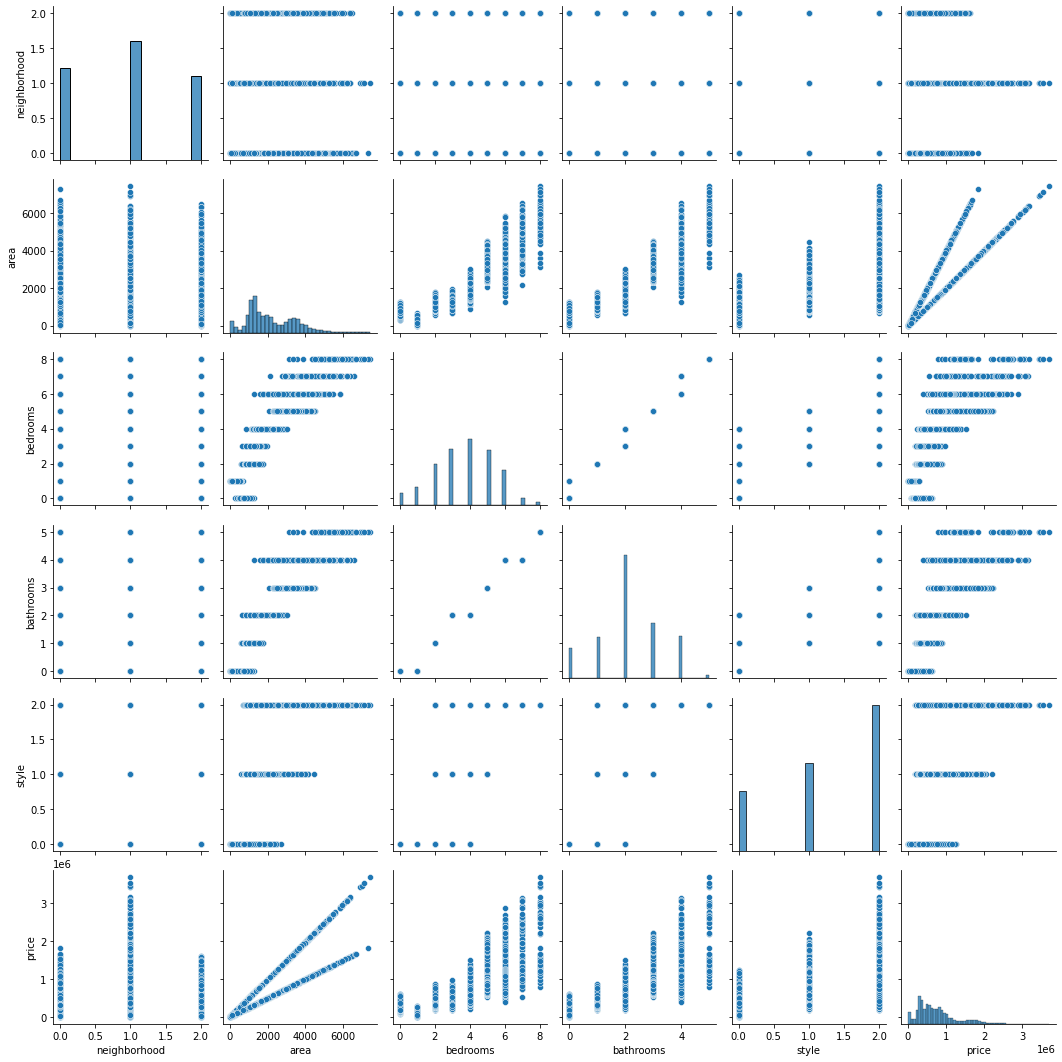

In [8]:
sns.pairplot(DF1)
plt.show()

y값(price)에 대한 대부분의 x값(area, bedrooms, bathrooms)가 양의 상관관계를 가지고 있다(대체로 비례하는 패턴을 보인다). 
style 의 경우도 연속형 데이터는 아니지만 비레하고 있다.

단, neighborhood의 경우 가운데가 위로 볼록한 형태의 패턴을 보이고 있다.

아래 분석부터는 area, bedrooms, bathrooms,price와 관련해서 진행하였다.

> 3) 상관계수 확인해보기
area, bedrooms, bathrooms
* price VS area

In [9]:
from scipy import stats

In [10]:
stats.pearsonr(DF1.price, DF1.area)[0]

0.8234537182735618

> * price VS bedrooms

In [11]:
stats.pearsonr(DF1.price, DF1.bedrooms)[0]

0.7434351418523943

> * price VS bathrooms

In [12]:
stats.pearsonr(DF1.price, DF1.bathrooms)[0]

0.7358511123795443

> 4) 선형 회귀 모델링(단일, 단차)
* Data Split(7:3, 2045)

In [46]:
from sklearn.model_selection import train_test_split

X = DF1[['area']] #'area','bedrooms','bathrooms'를 다 진행해본 결과 area의 결과가 가장 적합했다(결정계수가 가장 높음/MSE가 가장 낮음/ 시각화 그래프의 모양이 가장 비슷했음)
'y = DF1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data  : ' , X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data  :  (4219, 1) (4219,)
Test Data :  (1809, 1) (1809,)


> * 모델 생성

In [47]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> Weight와 Bias 알아보기

In [48]:
print('weight(w) : ', RA.coef_)
print('bias(b) : ', RA.intercept_)

weight(w) :  [330592.26512724]
bias(b) :  37180.89775208663


> * 결정계수(R-Square)

In [49]:
RA.score(X_test, y_test)

0.5370601818012191

> * 모델 평가(MSE)

In [50]:
from sklearn.metrics import mean_squared_error

y_hat = RA.predict(X_test)
mean_squared_error(y_test, y_hat)

127559159630.92636

> * 시각화 (y VS y_hat)

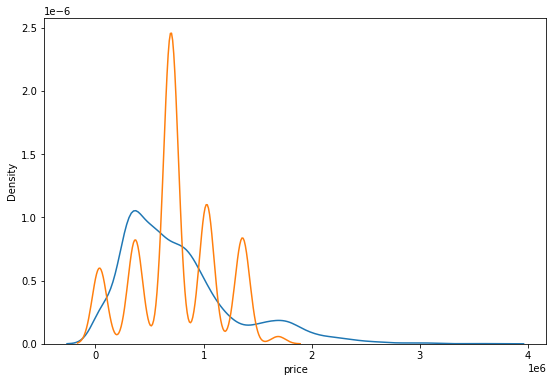

In [51]:
y_hat1 = RA.predict(X)

plt.figure(figsize = (9,6))
ax1 = sns.distplot(y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat1, hist = False, label = 'y_hat', ax = ax1)
plt.show()

> 5) 선형 회귀 모델링(단일, 다차)

> * 필요한 데이터 가져오기

In [22]:
DF2 = DF[['area','bedrooms','bathrooms','price']]

DF2.head(5)

,area,bedrooms,bathrooms,price
0,1188,3,2,598291
1,3512,5,3,1744259
2,1134,3,2,571669
3,1940,4,2,493675
4,2208,6,4,1101539


> * Data Split(7:3, 2045)

In [23]:
X = DF2[['area']]
y = DF2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (4219, 1) (4219,)
Test Data :  (1809, 1) (1809,)


> * 선형회귀 모델링 - 2차 다항식 변환

In [24]:

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = , include_bias = False)
X_train_poly = poly.fit_transform(X_train)

print('변환 전 데이터 : ', X_train.shape)
print('2차항 변환 데이터 : ', X_train_poly.shape)

변환 전 데이터 :  (4219, 1)
2차항 변환 데이터 :  (4219, 2)


> * High-Order 모델 생성

In [25]:
from sklearn.linear_model import LinearRegression

NL = LinearRegression()
NL.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> * Weight와 Bias

In [26]:
print('weight(w) : ', NL.coef_)
print('bias(b) : ', '%.8f' % NL.intercept_)

weight(w) :  [3.25839328e+02 4.65035767e-03]
bias(b) :  29697.22204199


> * 결정계수 (R-Square)

In [27]:
X_test_poly = poly.fit_transform(X_test)
NL.score(X_test_poly, y_test)

0.6778047487989153

> * 모델 평가(MSE)

In [28]:
from sklearn.metrics import mean_squared_error

X_test_poly = poly.fit_transform(X_test)

mean_squared_error(y_test, NL.predict(X_test_poly))

88778182097.60945

> * 시각화

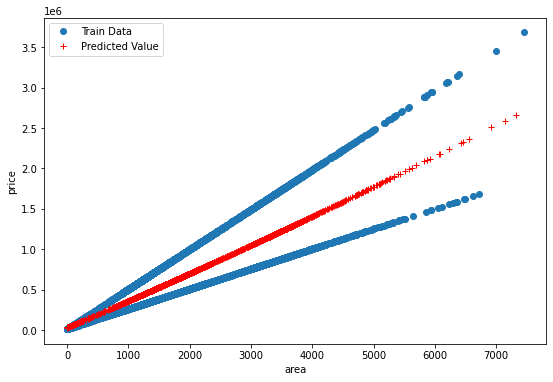

In [29]:
y_hat_test = NL.predict(X_test_poly)

plt.figure(figsize = (9,6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
plt.legend(loc = 'best')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

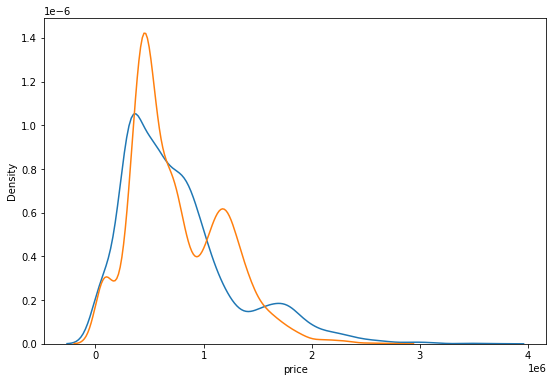

In [31]:
X_ploy = poly.fit_transform(X)
y_hat2 = NL.predict(X_ploy)

plt.figure(figsize = (9,6))
ax1 = sns.distplot(y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat2, hist = False, label = 'y_hat', ax = ax1)
plt.show()

### 3. 다중 회귀 분석
> * 필요한 데이터 가져오기

In [32]:
DF3 = DF[['area','bedrooms','bathrooms','price']]

DF3.head(5)

,area,bedrooms,bathrooms,price
0,1188,3,2,598291
1,3512,5,3,1744259
2,1134,3,2,571669
3,1940,4,2,493675
4,2208,6,4,1101539


> * Data Split(7:3, 2045)

In [33]:
from sklearn.model_selection import train_test_split

X = DF3[['area','bedrooms','bathrooms']]
y = DF3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (4219, 3) (4219,)
Test Data :  (1809, 3) (1809,)


> * 다중회귀 모델링 - 모델 생성

In [34]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> * Weight와 Bias

In [35]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', '%.8f' % MR.intercept_)

weight(w) :  [  346.0785613  -9785.3036604  18207.31285599]
bias(b) :  11743.96746589


> * 결정계수 (R-Square)

In [36]:
MR.score(X_test, y_test)

0.6781719844487373

> * 모델 평가(MSE)

In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

88676993413.81882

> * 시각화

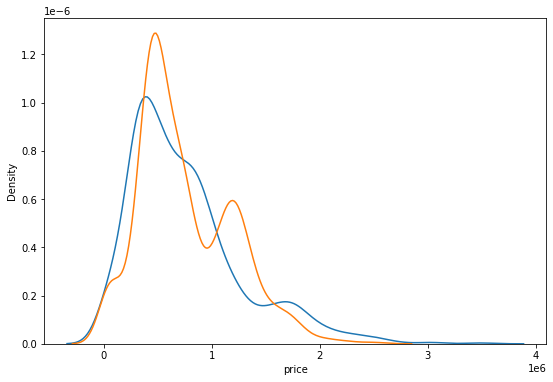

In [38]:
y_hat3 = MR.predict(X_test)

plt.figure(figsize = (9,6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(y_hat3, hist = False, label = 'y_hat', ax = ax1)
plt.show()

### 4. 최종 시각화

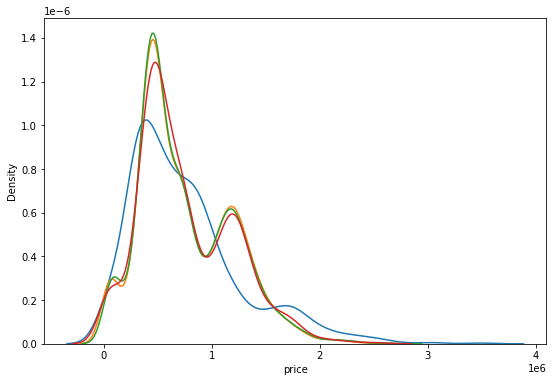

In [39]:
y_hat3 = MR.predict(X_test)

plt.figure(figsize = (9,6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(y_hat1, hist = False, label = 'y_hat', ax = ax1)
ax3 = sns.distplot(y_hat2, hist = False, label = 'y_hat', ax = ax1)
ax4 = sns.distplot(y_hat3, hist = False, label = 'y_hat', ax = ax1)
plt.show()

1.파란색 : 테스트 데이터

2.노란색 : Simple Linear Regression 결과('area','price')

3.초록색 : Lineare Regression 결과 ('area','price', degree=2)

4.빨간색 : Multivariate Regression 결과 ('area','bedrooms','bathrooms','price')

시각화 결과, 결정계수, MSE를 종합한 결과 위 4개의 결과중 4번이 실제 데이터와 가장 비슷하다고 생각합니다.



본 내용은 2021/03/02(화) 실습한 내용입니다.